In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('final_data.csv')

In [8]:
df = df.rename(columns={'average_soil_temperature': 'average_air_temperature'})

In [9]:
df.to_csv('final_data.csv',index=False)

In [10]:
df.head(1)

,Unnamed: 0,site,tree,plot,species,Date,longitude,latitude,da,mo,...,yr,average_stem_radius,change_stem_radius,average_basal_area,change_basal_area,average_air_temperature,average_air_pressure,average_humidity,avg_solar_irradiance,avg_soil_water_content
0,1,AK,1A,1,P glauca,2019-01-01,-149.71571,68.018576,1,1,...,2019,10.471403,0.002,344.476504,0.131595,-4.218056,89.953835,0.840035,0.0,0.077694


In [11]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0 site tree  plot   species        Date  longitude   latitude  \
0               1   AK   1A     1  P glauca  2019-01-01 -149.71571  68.018576   
1               2   AK   1A     1  P glauca  2019-02-01 -149.71571  68.018576   
2               3   AK   1A     1  P glauca  2019-03-01 -149.71571  68.018576   
3               4   AK   1A     1  P glauca  2019-05-01 -149.71571  68.018576   
4               5   AK   1A     1  P glauca  2019-06-01 -149.71571  68.018576   
...           ...  ...  ...   ...       ...         ...        ...        ...   
31845       31846   AK   6F     6  P glauca  2016-08-31 -149.76103  67.972423   
31846       31847   AK   6F     6  P glauca  2017-08-31 -149.76103  67.972423   
31847       31848   AK   6F     6  P glauca  2018-08-31 -149.76103  67.972423   
31848       31849   AK   6F     6  P glauca  2016-12-31 -149.76103  67.972423   
31849       31850   AK   6F     6  P glauca  2017-12-31 -149.76103  67.9724

In [12]:
df['freeze_flag'] = (df['average_air_temperature'] < 0).astype(int)

In [13]:
df.head()

,Unnamed: 0,site,tree,plot,species,Date,longitude,latitude,da,mo,...,average_stem_radius,change_stem_radius,average_basal_area,change_basal_area,average_air_temperature,average_air_pressure,average_humidity,avg_solar_irradiance,avg_soil_water_content,freeze_flag
0,1,AK,1A,1,P glauca,2019-01-01,-149.71571,68.018576,1,1,...,10.471403,0.002,344.476504,0.131595,-4.218056,89.953835,0.840035,0.000000,0.077694,1
1,2,AK,1A,1,P glauca,2019-02-01,-149.71571,68.018576,1,2,...,10.457236,0.001,343.545055,0.065706,-5.662500,93.803372,0.763849,1.619657,0.073754,1
2,3,AK,1A,1,P glauca,2019-03-01,-149.71571,68.018576,1,3,...,10.463347,0.001,343.946701,0.065744,-4.797222,93.997761,0.527651,0.000000,0.074172,1
3,4,AK,1A,1,P glauca,2019-05-01,-149.71571,68.018576,1,5,...,10.464564,0.005,344.026717,0.328752,0.015385,93.797640,0.562969,185.708290,0.098590,0
4,5,AK,1A,1,P glauca,2019-06-01,-149.71571,68.018576,1,6,...,10.543083,0.002,349.208780,0.132487,5.043056,92.596726,0.415431,212.142556,0.289046,0


In [14]:
df['air_pressure_cat'] = pd.qcut(df['average_air_pressure'], 3,
                                 labels=['low','medium','high'])

In [15]:
df['humidity_cat'] = pd.cut(df['average_humidity'],
                            bins=[0,30,60,100],
                            labels=['dry','comfortable','humid'])

In [17]:
df['solar_rank'] = df['avg_solar_irradiance'].rank(method='first')
df['solar_cat'] = pd.qcut(df['solar_rank'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [18]:
df['soil_moist_cat'] = pd.qcut(df['avg_soil_water_content'], 3,
                               labels=['dry','moderate','wet'])

In [35]:
df.head().sort_values('change_basal_area')

,Unnamed: 0,site,tree,plot,species,Date,longitude,latitude,da,mo,...,average_humidity,avg_solar_irradiance,avg_soil_water_content,freeze_flag,air_pressure_cat,humidity_cat,solar_rank,solar_cat,soil_moist_cat,growth_category
1,2,AK,1A,1,P glauca,2019-02-01,-149.71571,68.018576,1,2,...,0.763849,1.619657,0.073754,1,medium,dry,9495.0,Q2,dry,A Little Growth
2,3,AK,1A,1,P glauca,2019-03-01,-149.71571,68.018576,1,3,...,0.527651,0.000000,0.074172,1,medium,dry,2.0,Q1,dry,A Little Growth
0,1,AK,1A,1,P glauca,2019-01-01,-149.71571,68.018576,1,1,...,0.840035,0.000000,0.077694,1,low,dry,1.0,Q1,dry,A Little Growth
4,5,AK,1A,1,P glauca,2019-06-01,-149.71571,68.018576,1,6,...,0.415431,212.142556,0.289046,0,low,dry,27539.0,Q4,moderate,A Little Growth
3,4,AK,1A,1,P glauca,2019-05-01,-149.71571,68.018576,1,5,...,0.562969,185.708290,0.098590,0,medium,dry,27282.0,Q4,dry,A Lot of Growth


In [37]:
print(df['change_basal_area'].sort_values(ascending=False).head(10))

# See how many trees have "extreme" growth (e.g., > 10)
extreme_count = df[df['change_basal_area'] > 10].shape[0]
print(f"Number of trees with growth > 10: {extreme_count}")

31269    72.074559
23287    59.469226
23337    59.083564
23312    59.083564
31838    55.087860
24431    51.410891
23458    49.705506
30216    49.055179
23362    45.413287
10885    44.672770
Name: change_basal_area, dtype: float64
Number of trees with growth > 10: 328


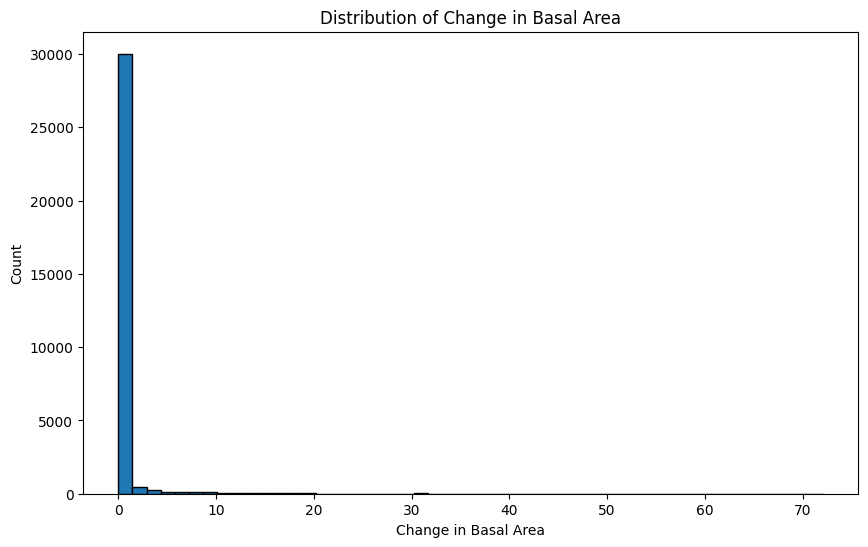

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['change_basal_area'], bins=50, edgecolor='black')
plt.title('Distribution of Change in Basal Area')
plt.xlabel('Change in Basal Area')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Change in Basal Area')

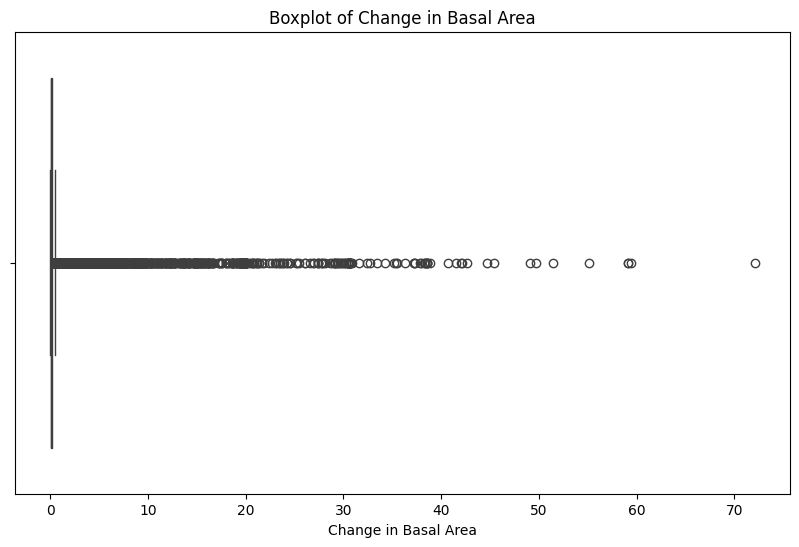

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['change_basal_area']) 

plt.title('Boxplot of Change in Basal Area')
plt.xlabel('Change in Basal Area')

In [ ]:
no_growth_cutoff = 0.0  

growth_data = df[df['change_basal_area'] > no_growth_cutoff]
high_growth_cutoff = growth_data['change_basal_area'].median()

print(f"No Growth Cutoff: {no_growth_cutoff}")
print(f"High Growth Cutoff: {high_growth_cutoff}")

def categorize_growth(val):
    if val <= no_growth_cutoff:
        return 'No Growth'
    elif val <= high_growth_cutoff:
        return 'A Little Growth'
    else:
        return 'A Lot of Growth'

# 5. Apply the function
df['growth_category'] = df['change_basal_area'].apply(categorize_growth)

No Growth Cutoff: 0.0
High Growth Cutoff: 0.133274708936305


In [20]:
df.to_csv('categorized_data.csv', index=False)

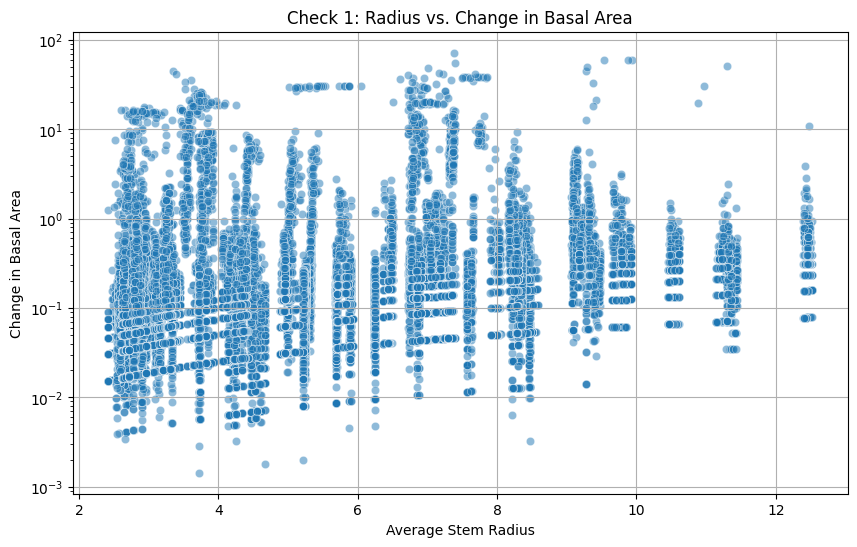

Rows with mathematical inconsistencies: 97
      average_stem_radius  change_stem_radius  change_basal_area  \
2593             2.682875               0.768          14.085595   
2613             2.780875               0.779          14.935876   
2702             2.788833               0.782          14.986025   
2733             2.665597               0.885          16.673516   
2753             2.801722               0.782          14.986025   

      expected_change  
2593        12.946177  
2613        13.611275  
2702        13.702796  
2733        14.822371  
2753        13.766125  

Final Category Counts:
growth_category
A Lot of Growth    13769
A Little Growth    13769
No Growth           3641
Extreme/Error        671
Name: count, dtype: int64


In [38]:


# --- CHECK 1: Radius vs. Change Plot ---
# If the "72" is real biology, big trees (large radius) should have big changes.
# If it's a sensor glitch, you will see dots all over the place (even for small trees).
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_stem_radius', y='change_basal_area', data=df, alpha=0.5)
plt.title('Check 1: Radius vs. Change in Basal Area')
plt.xlabel('Average Stem Radius')
plt.ylabel('Change in Basal Area')
plt.yscale('log') # Log scale helps see the spread
plt.grid(True)
plt.show()

# --- CHECK 2: Verify the Math (Geometric Consistency) ---
# Geometry Rule: Area Change should be roughly: Pi * (2 * Radius) * Radius_Change
# We calculate this "expected" change and see if it matches your column.
df['expected_change'] = np.pi * (2 * df['average_stem_radius']) * df['change_stem_radius']

# Calculate the difference between "Actual" and "Expected"
df['calc_error'] = np.abs(df['change_basal_area'] - df['expected_change'])

# Show the rows where the math doesn't add up (Diff > 1.0)
suspicious_math = df[df['calc_error'] > 1.0]
print(f"Rows with mathematical inconsistencies: {len(suspicious_math)}")
if not suspicious_math.empty:
    print(suspicious_math[['average_stem_radius', 'change_stem_radius', 'change_basal_area', 'expected_change']].head())

# --- CHECK 3: The "Extreme" Category Split ---
# This creates your final categories, isolating the glitches (>10) so they don't ruin your analysis.

# Define thresholds (using the logic we found earlier)
no_growth_cutoff = 0.001
extreme_cutoff = 10.0

# Calculate median ONLY for "Normal Growing" trees (0.001 < x < 10)
normal_growth = df[(df['change_basal_area'] > no_growth_cutoff) & 
                   (df['change_basal_area'] <= extreme_cutoff)]
median_growth = normal_growth['change_basal_area'].median()

def categorize_growth(val):
    if val <= no_growth_cutoff:
        return 'No Growth'
    elif val <= median_growth:
        return 'A Little Growth'
    elif val <= extreme_cutoff:
        return 'A Lot of Growth'
    else:
        return 'Extreme/Error' # Isolates the 72s

# Apply and Check
df['growth_category'] = df['change_basal_area'].apply(categorize_growth)
print("\nFinal Category Counts:")
print(df['growth_category'].value_counts())